In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# Dimensional parameters
# half length of strip
L = 100.0 # (m)
# width of the crack
W = 0.1 # (m)
# ice thickeness
H = 100.0 # (m)
# crack length
Zc = 50.0 # (m)

# density of w-water i-ice
rho_w = 1000 # (kg/m^3)
rho_i = 917 # (kg/m^3)
# gravitational acceleration
g = 9.8 # (m/s^2)

# physical properties
# latent heat
Lw = 3.335e5 #(J/kg)
# heat capacity
Cp = 2097 #(J/kg/K)
# thermal diffusity
kappa = 1.09e-6 # m^2/s

# line heat source
qi = rho_w*Lw*W
Ti = qi/rho_w/Cp
pi=math.pi

In [2]:
def greensx(x,t):
    return 1/(2*np.sqrt(kappa*pi*t))*np.exp(-x**2/(4*kappa*t))
def greensn(z,t,n):
    return 1/n*np.sin(n*pi*z/H)*np.exp(-kappa*n*n*pi*pi*t/(H**2))*(1-np.cos(n*pi*Zc/H))
def greensz(z,t):
    sun_n_old=0
    sum_n_new=0
    for i in range(1,11):
        sum_n_old = sum_n_new
        sum_n_new = sum_n_old + greensn(z,t,i)
    return 2/(pi)*sum_n_new
def greens(x,z,t):
    return Ti*greensx(x,t)*greensz(z,t)

In [3]:
# time range
year_start = 1
year_end = 101
tstp = 1
year = np.arange(year_start,year_end + tstp,tstp)
vt = 365*24*3600*year
# vt = 365*24*3600*np.arange(year,year + tstp/2,tstp)
nt = np.shape(vt)[0]

nx, nz = (400, 200)
x = np.linspace(-L, L, nx+1)
xstp = x[1]-x[0]
z = np.linspace(0, H, nz+1)
zstp = z[1]-z[0]

xT = np.linspace(-L+0.5*xstp, L-0.5*xstp, nx)
zT = np.linspace(0+0.5*zstp, H-0.5*xstp, nz)

dTx = np.zeros((nx,nt))
dTz = np.zeros((nz,nt))
dT = np.zeros((nz,nx,nt))

In [4]:
# Thermal conduction in x,z-direction
for it,time in enumerate(vt):
    for ix,xcoord in enumerate(xT):
        dTx[ix,it] = greensx(xcoord,time)
    for iz,zcoord in enumerate(zT):
        dTz[iz,it] = greensz(zcoord,time)
    for ix,xcoord in enumerate(xT):
        for iz,zcoord in enumerate(zT):
            dT[iz,ix,it] = Ti*dTx[ix,it]*dTz[iz,it]
dT_current = dT[:,:,0]

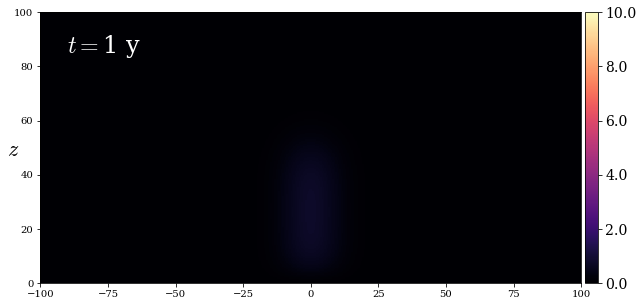

In [5]:
# Create new Figure and an Axes which fills it.
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rc('font', family='serif')
mpl.rcParams["mathtext.fontset"]='cm'
plt.rcParams['figure.figsize'] = (10.0, 6.0)
fs=14

it=0
fig, ax1 = plt.subplots()
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

ax1 = plt.gca()
# ax1.set_xlabel(r'$x$',fontsize=22)
ax1.set_ylabel(r'$z$',rotation=0,fontsize=22,loc='center')
ax1.set_xlim([-L, L])
ax1.set_ylim([0, H])
ax1.set_aspect('equal')
ax1.yaxis.set_label_coords(-0.05, 0.45)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax1.annotate(r'$t=$'+str(year[it])+' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=24,color='w')

# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cmap = mpl.cm.magma
temperature = ax1.pcolormesh(x,z,dT_current,shading='flat',cmap=cmap,norm=norm) # plot the pcolor

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, format="%2.1f")

In [6]:
#def update(tindex):
#    dT_current=dT[:,:,tindex]  
#    # temperature
#    ax1.annotate(r'$t=$'+str(year[tindex])+' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=24,color='w')
#    temperature = ax1.pcolormesh(x,z,dT_current,shading='flat',cmap=cmap,norm=norm) # plot the pcolor
    
## Construct the animation, using the update function as the animation director.
#animation = FuncAnimation(fig, update, interval=100)
#animation.save(filename='movie.mp4')
#plt.show()

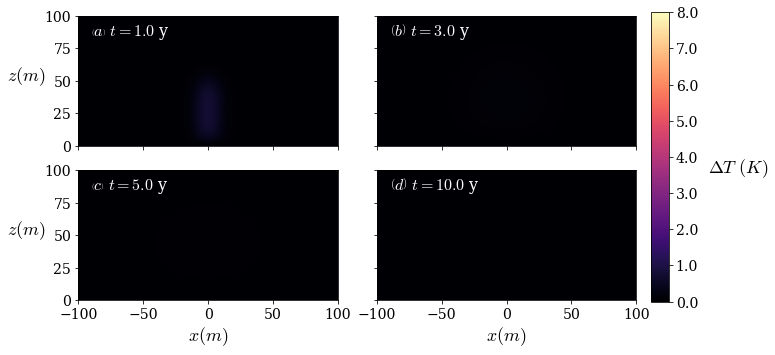

In [7]:
# Create new Figure and an Axes which fills it.

plt.rc('font', family='serif')
mpl.rcParams["mathtext.fontset"]='cm'
# plt.rcParams['figure.figsize'] = (10.0, 6.0)
fs=14

fig, ax = plt.subplots(2,2,sharex='col',sharey='row')
########################### Figure 1 ################################
ax1 = ax[0,0]
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax1.set_ylabel(r'$z (m)$',rotation=0,fontsize=18,loc='center')
ax1.set_xlim([-L, L])
ax1.set_ylim([0, H])
ax1.set_aspect('equal')
ax1.yaxis.set_label_coords(-0.2, 0.45)
plt.setp(ax1.get_xticklabels(), visible=False)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax1.annotate(r'$\left(a\right)\ t=1.0$'+' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=8)
cmap = mpl.cm.magma
temperature = ax1.pcolormesh(x,z,dT[:,:,0],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

########################### Figure 2 ################################
ax2 = ax[0,1]
ax2 = plt.subplot(222, sharey=ax1)
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax2.set_xlim([-L, L])
ax2.set_ylim([0, H])
ax2.set_aspect('equal')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.yaxis.set_label_coords(-0.05, 0.45)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax2.annotate(r'$\left(b\right)\ t=3.0$'' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
temperature = ax2.pcolormesh(x,z,dT[:,:,10],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

########################### Figure 3 ################################
ax3 = ax[1,0]
ax3 = plt.subplot(223, sharex=ax1)
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax3.set_xlabel(r'$x (m)$',rotation=0,fontsize=18,loc='center')
ax3.set_ylabel(r'$z (m)$',rotation=0,fontsize=18,loc='center')
ax3.set_xlim([-L, L])
ax3.set_ylim([0, H])
ax3.set_aspect('equal')
plt.setp(ax3.get_yticklabels(), visible=True)
ax3.yaxis.set_label_coords(-0.2, 0.45)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax3.annotate(r'$\left(c\right)\ t=5.0$'' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
temperature = ax3.pcolormesh(x,z,dT[:,:,20],shading='flat',cmap=cmap,norm=norm) # plot the pcolor


############################ Figure 4 ################################
ax4 = ax[1,1]
ax4 = plt.subplot(224, sharex=ax2)
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax4.set_xlabel(r'$x (m)$',rotation=0,fontsize=18,loc='center')
ax4.set_xlim([-L, L])
ax4.set_ylim([0, H])
ax4.set_aspect('equal')
plt.setp(ax4.get_yticklabels(), visible=False)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax4.annotate(r'$\left(d\right)\ t=10.0$'' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
temperature = ax4.pcolormesh(x,z,dT[:,:,45],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

cax = plt.axes([0.92, 0.17, 0.025, 0.67])
divider = make_axes_locatable(ax4)
# cax = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, format="%2.1f")
cbar.set_label(r'$\Delta T\ (K)$',loc='center',rotation=0,labelpad=40,fontsize=18)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=-0.1)

plt.savefig('Heat_diffusion'+'.png', bbox_inches='tight', dpi=100)

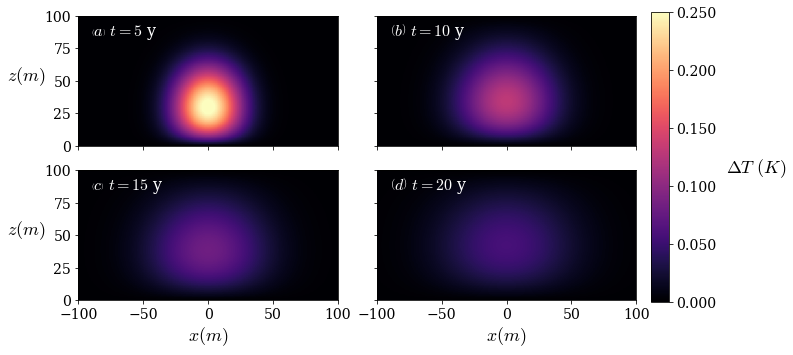

In [23]:
# Create new Figure and an Axes which fills it.

colormax=0.25
plt.rc('font', family='serif')
mpl.rcParams["mathtext.fontset"]='cm'
# plt.rcParams['figure.figsize'] = (10.0, 6.0)
fs=14

fig, ax = plt.subplots(2,2,sharex='col',sharey='row')
########################### Figure 1 ################################
ax1 = ax[0,0]
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax1.set_ylabel(r'$z (m)$',rotation=0,fontsize=18,loc='center')
ax1.set_xlim([-L, L])
ax1.set_ylim([0, H])
ax1.set_aspect('equal')
ax1.yaxis.set_label_coords(-0.2, 0.45)
plt.setp(ax1.get_xticklabels(), visible=False)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax1.annotate(r'$\left(a\right)\ t=5$'+' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=colormax)
cmap = mpl.cm.magma
temperature = ax1.pcolormesh(x,z,dT[:,:,4],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

########################### Figure 2 ################################
ax2 = ax[0,1]
ax2 = plt.subplot(222, sharey=ax1)
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax2.set_xlim([-L, L])
ax2.set_ylim([0, H])
ax2.set_aspect('equal')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.yaxis.set_label_coords(-0.05, 0.45)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax2.annotate(r'$\left(b\right)\ t=10$'' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=colormax)
temperature = ax2.pcolormesh(x,z,dT[:,:,9],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

########################### Figure 3 ################################
ax3 = ax[1,0]
ax3 = plt.subplot(223, sharex=ax1)
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax3.set_xlabel(r'$x (m)$',rotation=0,fontsize=18,loc='center')
ax3.set_ylabel(r'$z (m)$',rotation=0,fontsize=18,loc='center')
ax3.set_xlim([-L, L])
ax3.set_ylim([0, H])
ax3.set_aspect('equal')
plt.setp(ax3.get_yticklabels(), visible=True)
ax3.yaxis.set_label_coords(-0.2, 0.45)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax3.annotate(r'$\left(c\right)\ t=15$'' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=colormax)
temperature = ax3.pcolormesh(x,z,dT[:,:,14],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

############################ Figure 4 ################################
ax4 = ax[1,1]
ax4 = plt.subplot(224, sharex=ax2)
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

# ax1.set_xlabel(r'$x$',fontsize=22)
ax4.set_xlabel(r'$x (m)$',rotation=0,fontsize=18,loc='center')
ax4.set_xlim([-L, L])
ax4.set_ylim([0, H])
ax4.set_aspect('equal')
plt.setp(ax4.get_yticklabels(), visible=False)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
ax4.annotate(r'$\left(d\right)\ t=20$'' y', xy=(0.05, 0.85), xycoords='axes fraction',fontsize=16,color='w')
# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=colormax)
temperature = ax4.pcolormesh(x,z,dT[:,:,19],shading='flat',cmap=cmap,norm=norm) # plot the pcolor

cax = plt.axes([0.92, 0.17, 0.025, 0.67])
divider = make_axes_locatable(ax4)
# cax = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, format="%2.3f")
cbar.set_label(r'$\Delta T\ (K)$',loc='center',rotation=0,labelpad=40,fontsize=18)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=-0.1)

plt.savefig('Heat_diffusion'+'.png', bbox_inches='tight', dpi=100)

In [26]:
3.34*0.92*0.1

0.30728